In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import os
# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow
from PIL import Image


def evaluate_extraction(img): 
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    if isinstance(img, Image.Image):
        img = np.array(img)

    thresh = img

    data = pytesseract.image_to_data(thresh, output_type=Output.DICT)

    n_boxes = len(data['text'])
    for i in range(n_boxes):
        if int(data['conf'][i]) > 60:
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) # img can be any suitable image for drawing

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    econfig = r'--oem 3 --psm 6'  # Treat the image as a single uniform block of text
    extracted_text = pytesseract.image_to_string(pimg, config=econfig)
    print("Extracted Text:", extracted_text)

In [ ]:

from pdf2image import convert_from_path
import os

def convert_pdf_to_images(pdf_path, output_folder):
    try:
        images = convert_from_path(pdf_path)

        os.makedirs(output_folder, exist_ok=True)

        # Save each image
        for i, image in enumerate(images):
            image_path = os.path.join(output_folder, f"page_{i + 1}.jpg")
            image.save(image_path, "JPEG")
            print(f"Saved image: {image_path}")
    except Exception as e:
        print(f"Error converting PDF to images: {e}")

# Example Usage:
pdf_file_path = "/content/scannedExample.pdf" 
output_image_folder = "/content/pdf2_images"  
convert_pdf_to_images(pdf_file_path, output_image_folder)


Saved image: /content/pdf2_images/page_1.jpg


In [ ]:
import cv2
import numpy as np
import pytesseract

def enhanced_preprocess_image(image):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to create a binary image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Use median blurring to remove noise
    blur = cv2.medianBlur(thresh, 3)

    # Apply dilation and erosion to enhance text features
    kernel = np.ones((2, 2), np.uint8)
    dilated = cv2.dilate(blur, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Sharpen the image
    sharpened = cv2.addWeighted(eroded, 1.5, cv2.GaussianBlur(eroded, (0, 0), 3), -0.5, 0)

    return sharpened

Processing image: /content/pdf2_images/page_1.jpg


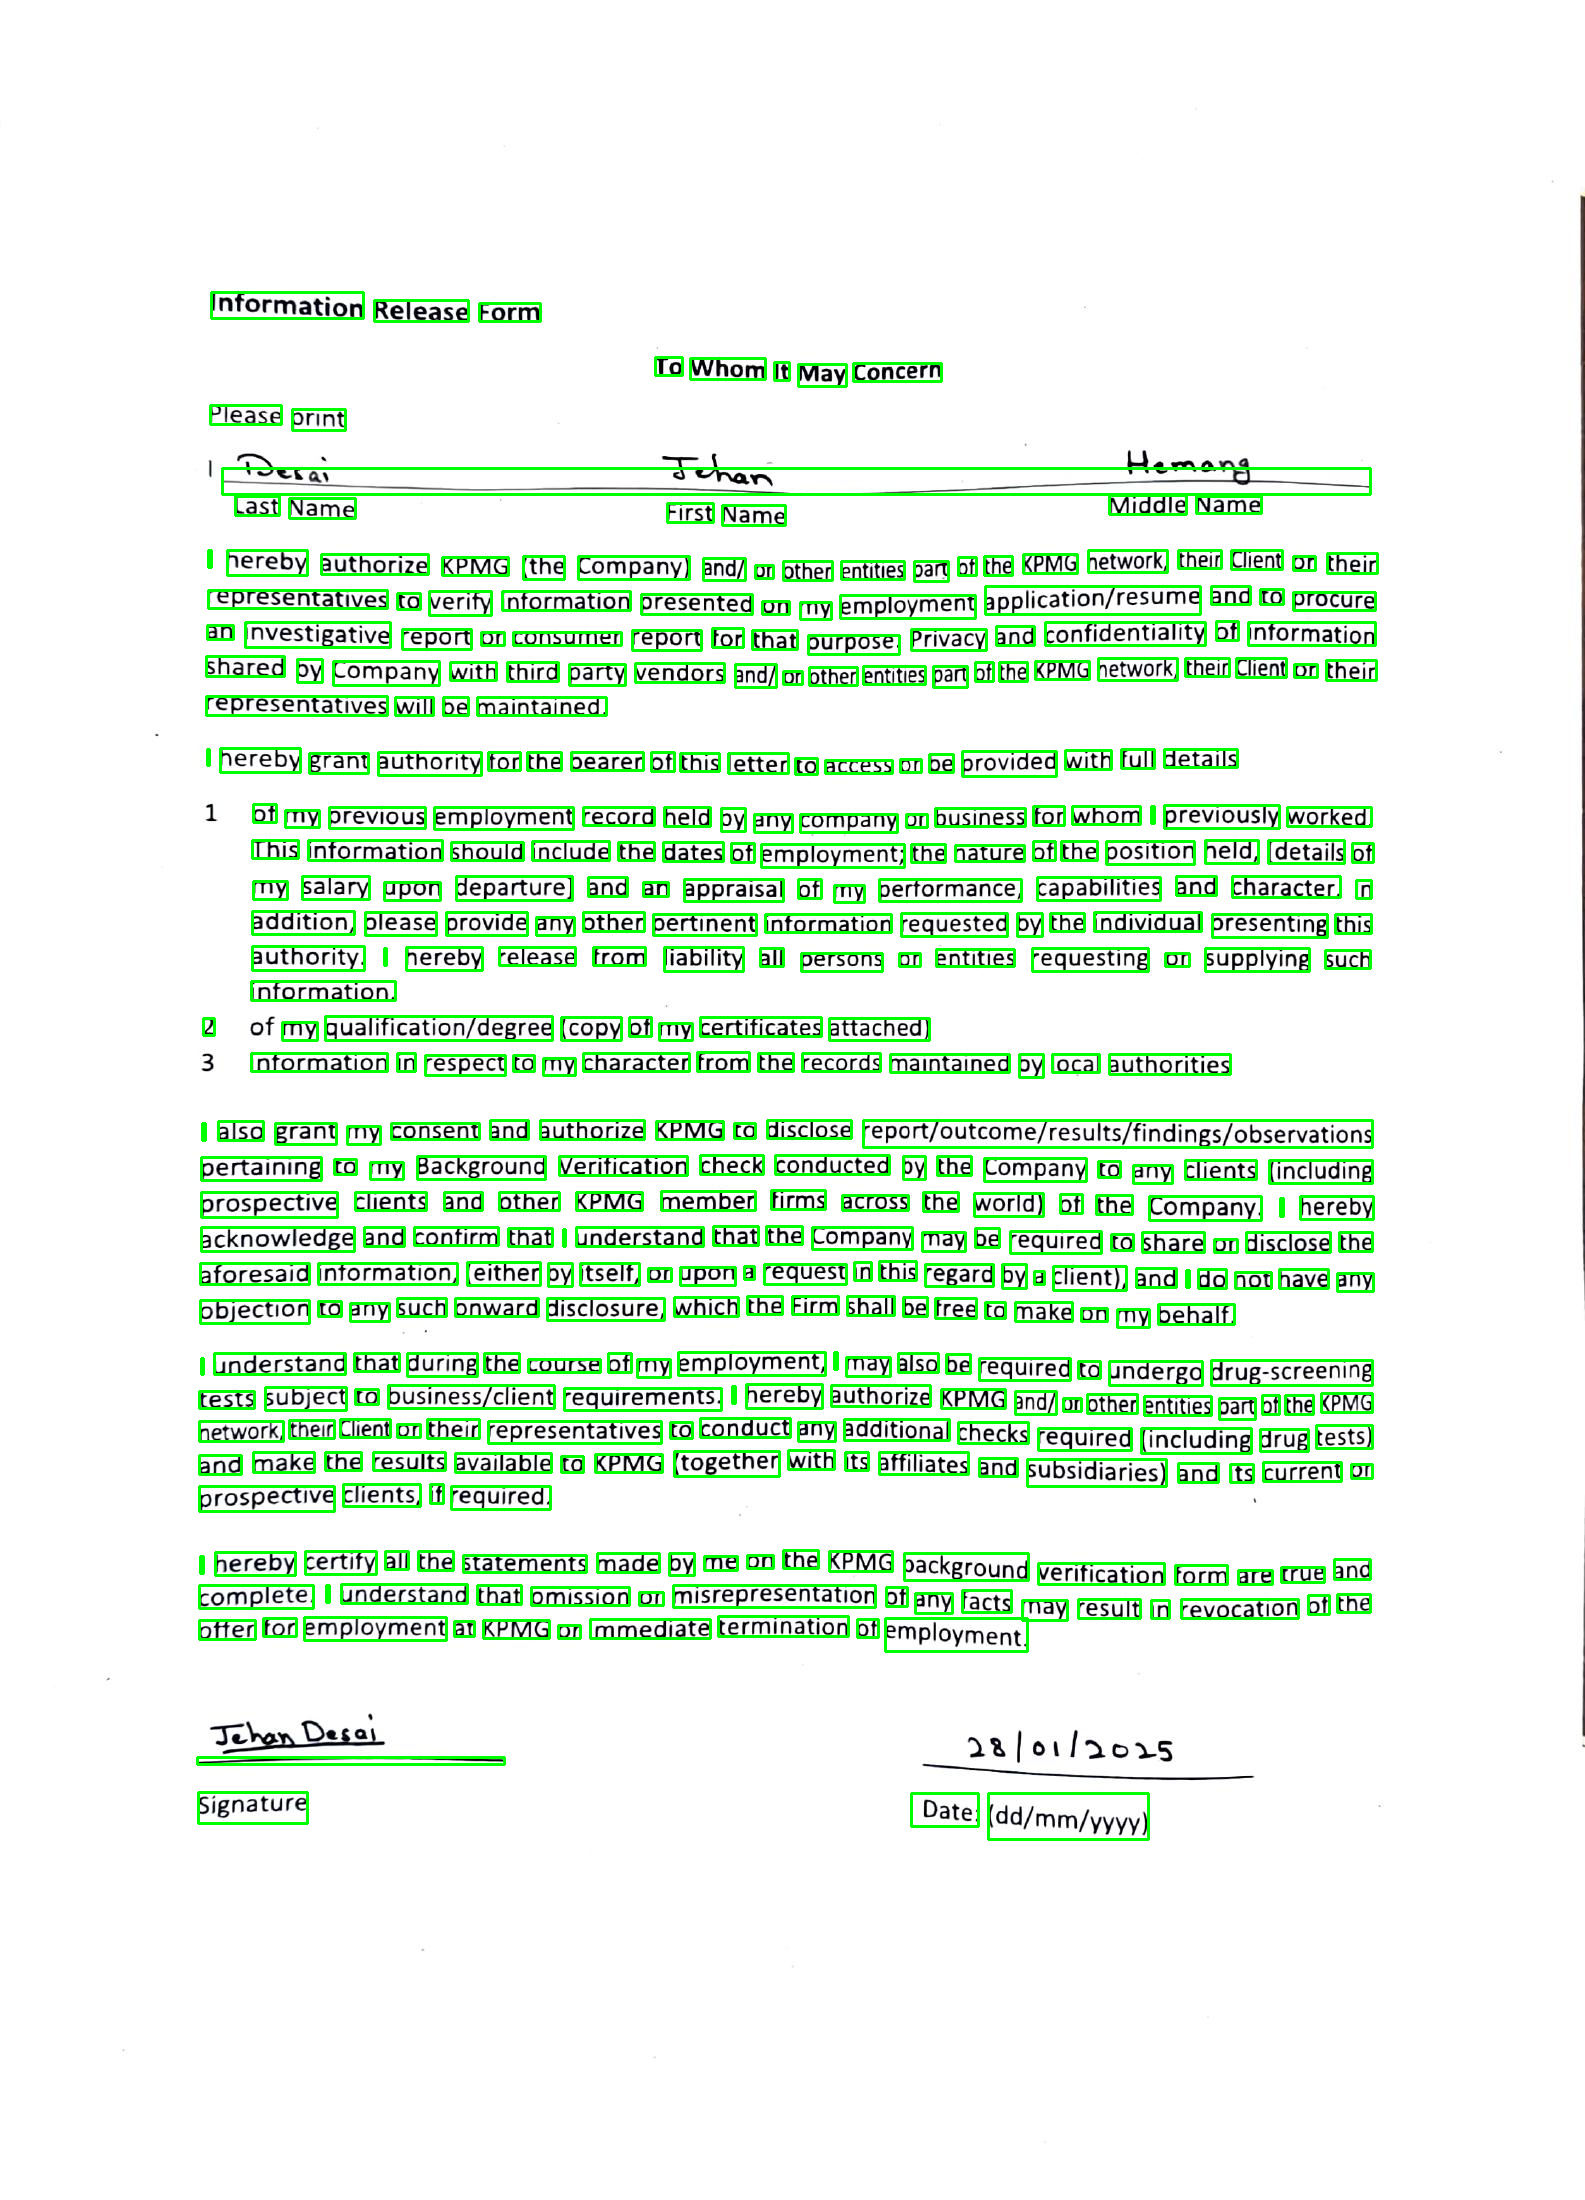

Extracted Text: Information Release Form
To Whom It May Concern
Please print
|_Watas Then emg
Last Name First Name Middie Name
| hereby authorize KPMG (the Company) and/ or other entities part of the KPMG network, their Client or their
representatives to verify information presented on my employment application/resume and to procure
an investigative report or consumer report for that purpose. Privacy and confidentiality of information
shared by Company with third party vendors and/ or other entities part of the KPMG network, their Client or their
representatives will be maintained.
| hereby grant authority for the bearer of this letter to access or be provided with full details
1 of my previous employment record held by any company or business for whom | previously worked.
This information should include the dates of employment; the nature of the position held, [details of
my salary upon departure] and an appraisal of my performance, capabilities and character. In
addition, please prov

In [ ]:
pdf_images_folder = '/content/pdf2_images'
image_files = [f for f in os.listdir(pdf_images_folder) if os.path.isfile(os.path.join(pdf_images_folder, f))]

for image_file in image_files:
    image_path = os.path.join(pdf_images_folder, image_file)
    print(f"Processing image: {image_path}")
    img = cv2.imread(image_path) 
    # pimg= enhanced_preprocess_image(img)
    evaluate_extraction(img)

In [ ]:
def preprocess_image_for_ocr(image_path):
    """
    Preprocesses an image for OCR using a combination of techniques.
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise Reduction
    gray = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)

    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # gray = clahe.apply(gray)

    # Thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Morphological Operations with Top-hat and Black-hat
    kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size if needed
    tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel, iterations=2)  # Adjust iterations
    blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel, iterations=2)  # Adjust iterations

    combined = cv2.add(thresh, tophat)
    combined = cv2.subtract(combined, blackhat)

    # Gaussian Blur for Smoothing
    # combined = cv2.GaussianBlur(combined, (3, 3), 0)

    return combined


Processing image: /content/pdf2_images/page_1.jpg


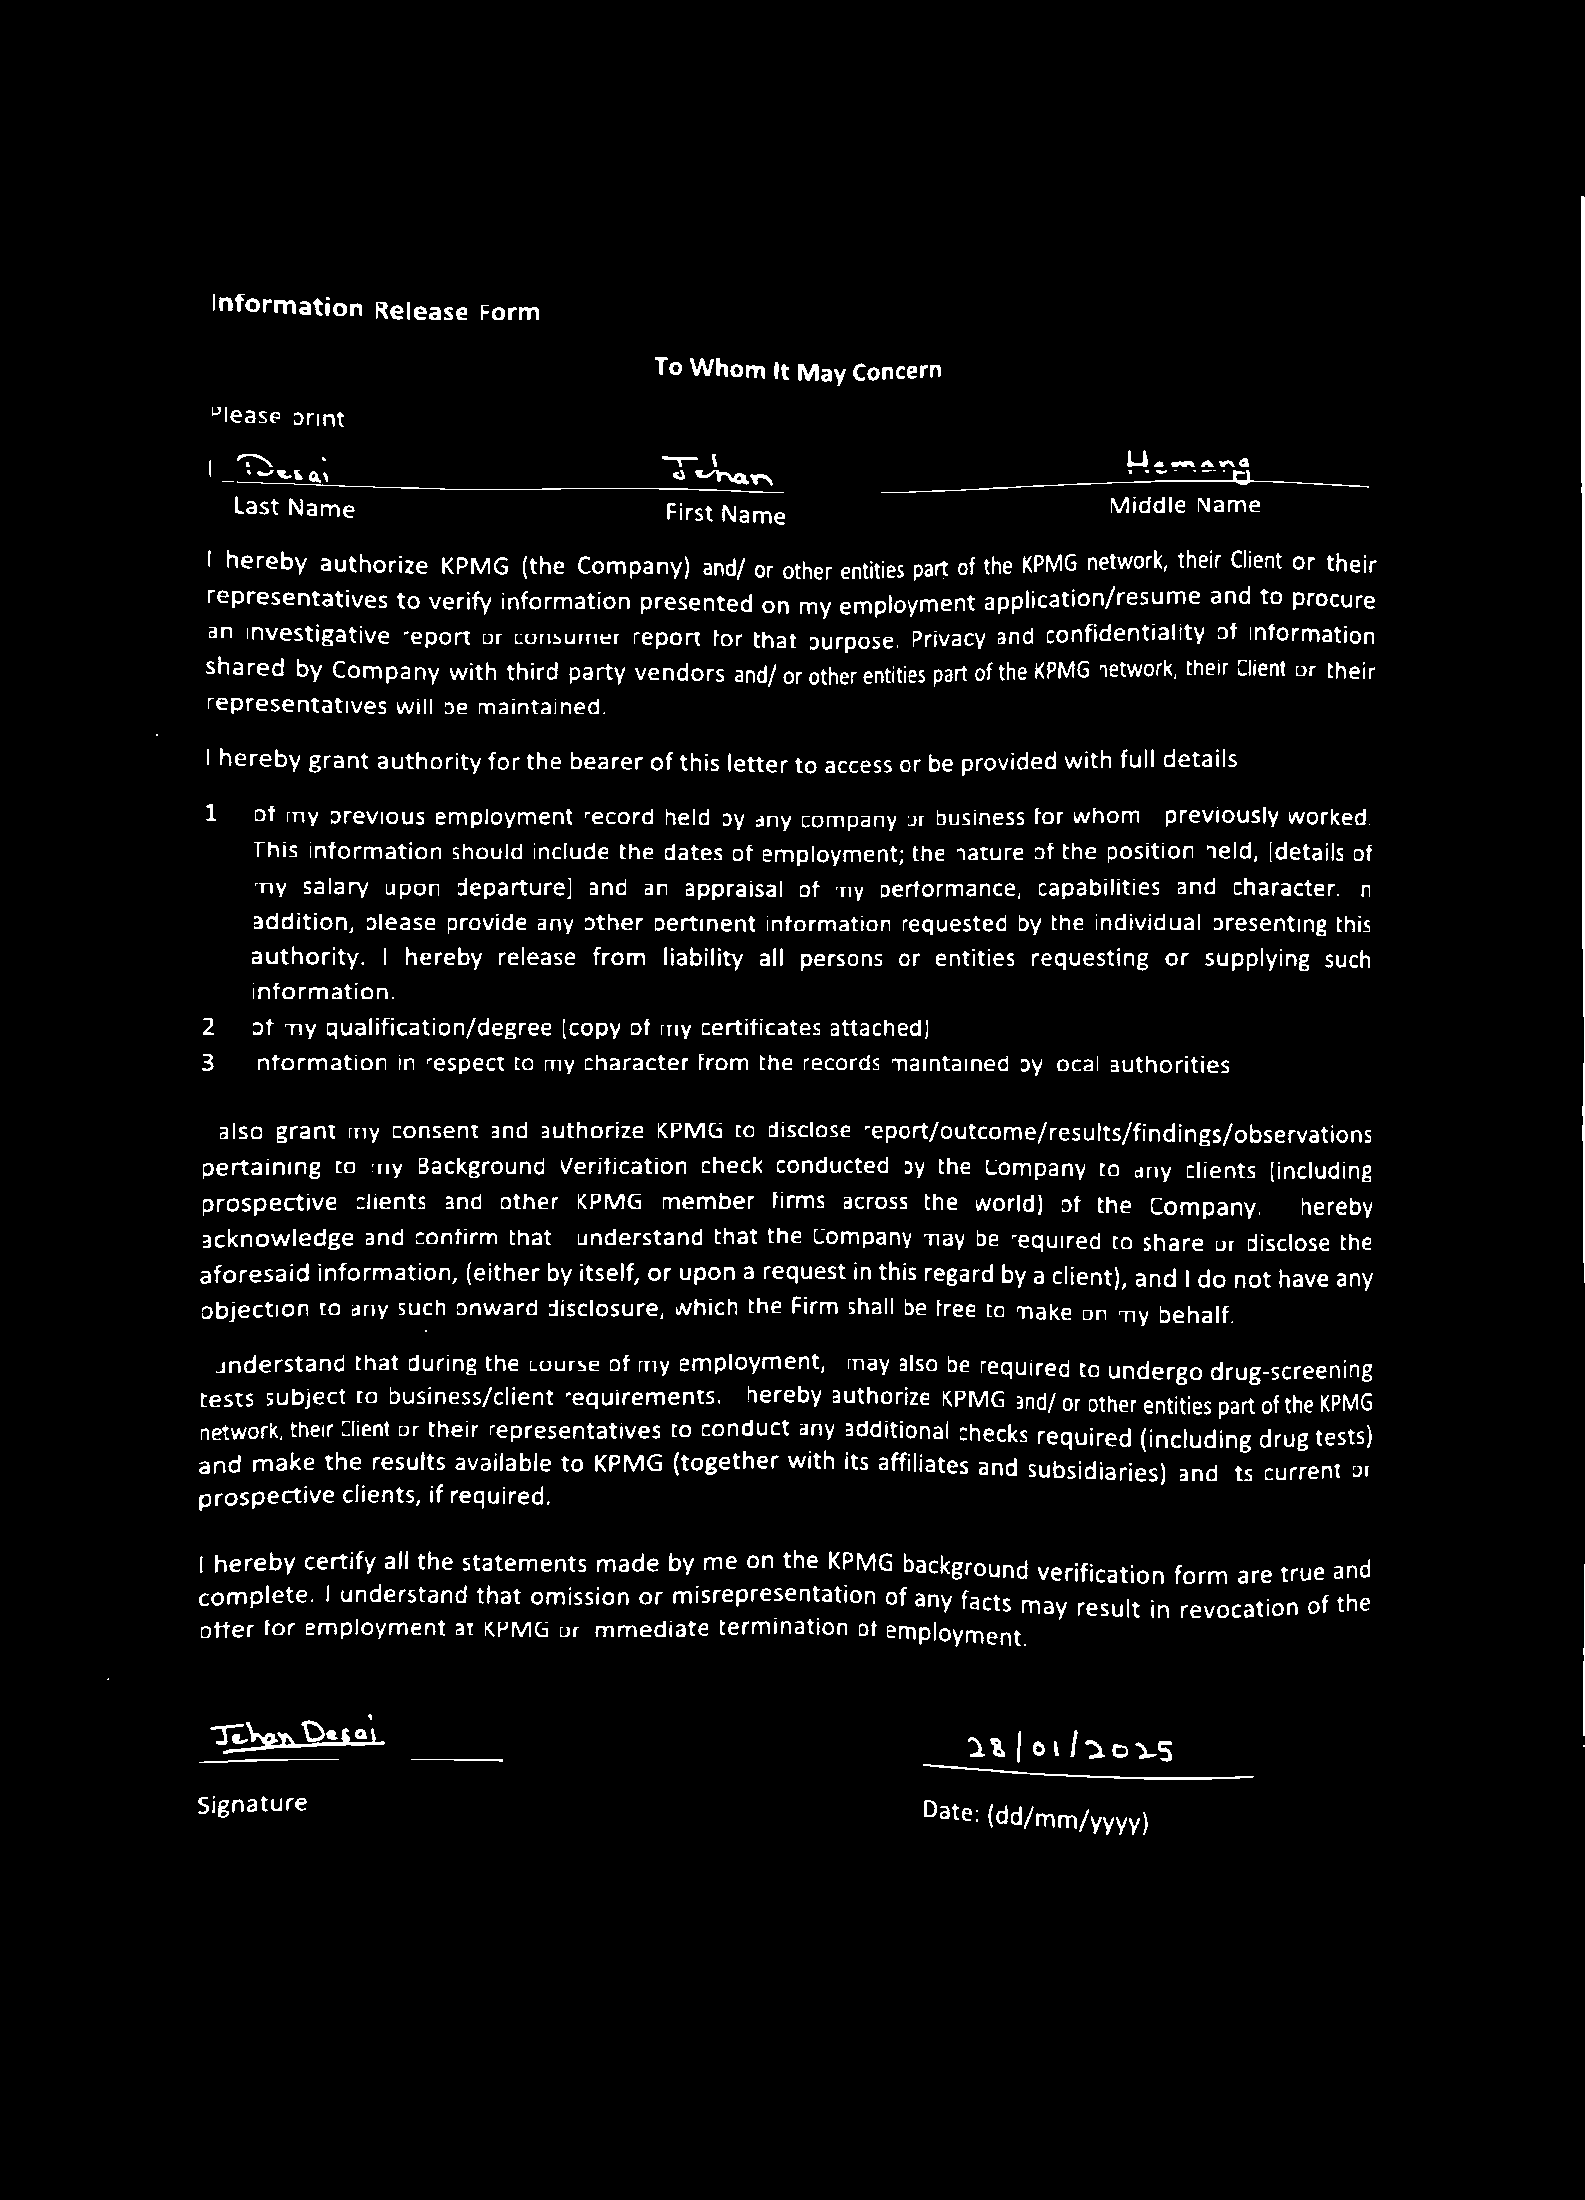

Extracted Text: MOLE eM et ac
Ua ees
edt rNToMelaT ate
ene Sean fe et aa
eS en a
Last Name Gieta EL el

Ic: ArT Uae a reo 4206) Curae TT LEE. Amon ae CC ke US network, their Client or their
No Co CU alta Le SO Tae ts Rol cae dL Sea Aaa CUS tet

an investigative -eport or consumer report tor that Sig est Madi 1S Ce confidentiality of information

SCL el enue Om CuCl Rm natn Cus mucho Ue Lela tg
representatives will se maintained.
eee lege emu eee eae Cla Cie taeteeea Ce ceca Ram Leste)

1 of my drevious employment ‘ecord held sy any company uw business for whom = previously worked

This information should include the dates of employment; the rature of the position eld, [details of
ny Salary upon departure] and an appraisal of ny performance, capabilities and character. n
addition, slease pravide any other pertinent intormation requested by the individual sresenting this
ELV daro) die Aa aCe 19) (cS cele Fl <Y1 Le me] VL ted oe Tala Sade [eke A MST] fod Ta Ta
information.

2 at ny qualif

In [ ]:
pdf_images_folder = '/content/pdf2_images'
image_files = [f for f in os.listdir(pdf_images_folder) if os.path.isfile(os.path.join(pdf_images_folder, f))]

for image_file in image_files:
    image_path = os.path.join(pdf_images_folder, image_file)
    print(f"Processing image: {image_path}")

    pimg = preprocess_image_for_ocr(image_path)
    evaluate_extraction(pimg)

In [ ]:
def simple_preprocess_and_ocr(image_path):
    import cv2
    import pytesseract
    from PIL import Image

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Gaussian Blur to Reduce Noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Otsu’s Thresholding for Binarization
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Resize Image to Increase Clarity
    scale_percent = 200  # Scale image by 200%
    width = int(binary.shape[1] * scale_percent / 100)
    height = int(binary.shape[0] * scale_percent / 100)
    resized = cv2.resize(binary, (width, height), interpolation=cv2.INTER_CUBIC)

    custom_config = r'--oem 3 --psm 6'  # PSM 6 assumes a single uniform block of text
    extracted_text = pytesseract.image_to_string(resized, config=custom_config)

    processed_pil = Image.fromarray(resized)

    return extracted_text, processed_pil

Processing image: /content/pdf2_images/page_1.jpg


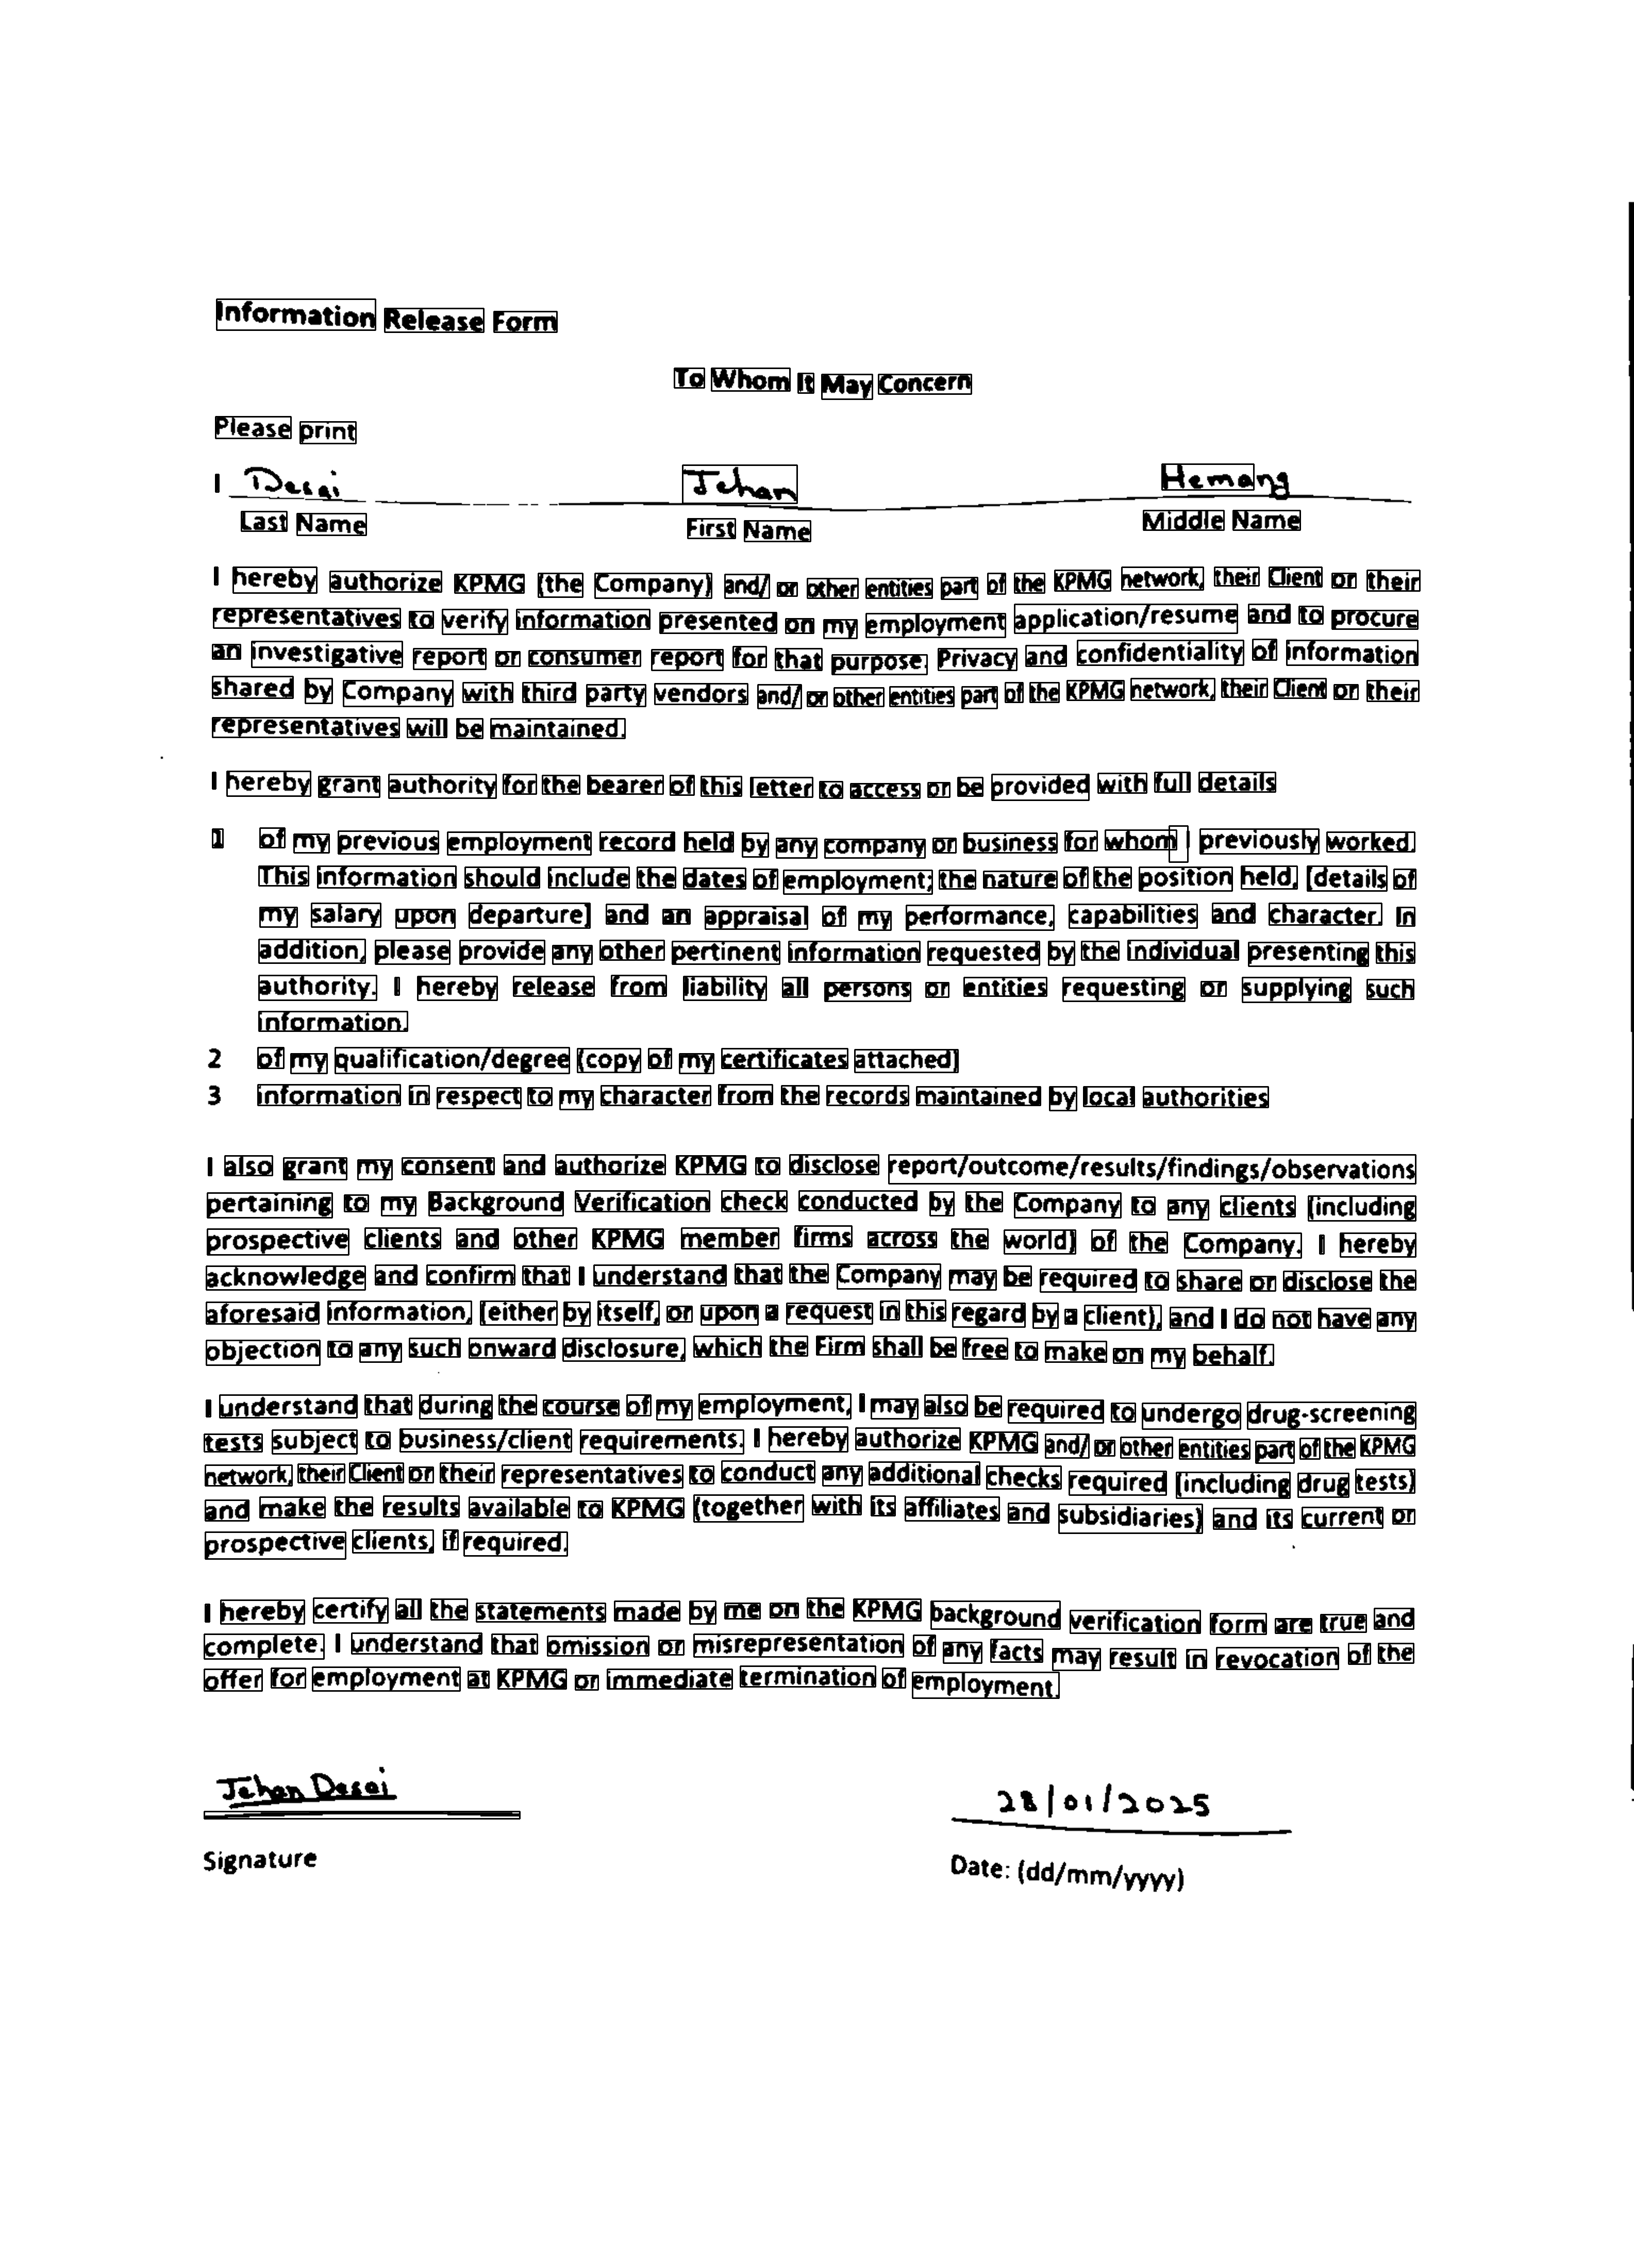

Extracted Text: Information Release Form
To Whom It May Concern
Please print
|_Watas Then emg
Last Name First Name Middie Name
| hereby authorize KPMG (the Company) and/ or other entities part of the KPMG network, their Client or their
representatives to verify information presented on my employment application/resume and to procure
an investigative report or consumer report for that purpose. Privacy and confidentiality of information
shared by Company with third party vendors and/ or other entities part of the KPMG network, their Client or their
representatives will be maintained.
| hereby grant authority for the bearer of this letter to access or be provided with full details
1 of my previous employment record held by any company or business for whom | previously worked.
This information should include the dates of employment; the nature of the position held, [details of
my salary upon departure] and an appraisal of my performance, capabilities and character. In
addition, please prov

In [ ]:
pdf_images_folder = '/content/pdf2_images'
image_files = [f for f in os.listdir(pdf_images_folder) if os.path.isfile(os.path.join(pdf_images_folder, f))]

for image_file in image_files:
    image_path = os.path.join(pdf_images_folder, image_file)
    print(f"Processing image: {image_path}")

    _,pimg = simple_preprocess_and_ocr(image_path)
    evaluate_extraction(pimg)